<a href="https://colab.research.google.com/github/siva4iov/FlatsPrice_DS_Proj/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import os
from google.colab import files
import os
import matplotlib.pyplot as plt
import seaborn as sns

if not os.path.exists("/content/dataset_clean_full.csv"): #cleaned dataset with geocoding
  files.upload()
if not os.path.exists("/content/features_decode.csv"): #explained columns
  files.upload()

## Columns explanation

In [13]:
df = pd.read_csv("dataset_clean_full.csv", sep=";")
features = pd.read_csv("features_decode.csv", sep=";")
display(features)


,name,meaning
0,Appliances_1,утюг
1,Appliances_2,телевизор
2,Appliances_3,водонагреватель
3,Appliances_4,кондиционер
4,Appliances_5,посудомоечная машина
5,Appliances_6,фен
6,Appliances_7,микроволновка
7,Appliances_8,плита
8,Appliances_9,стиральная машина
9,Appliances_10,холодильник


In [14]:
df.head()

,Living_space,Num_of_rooms,Renovation,Price,Total_area,Kitchen_area,Floor,Appliances_1,Appliances_2,Appliances_3,...,coord,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9
0,20.0,1,1,27000,39.0,12.0,10,0,1,0,...,"(55.7978535, 49.1793271)",1,0,0,0,0,0,0,0,0
1,NaN,1,1,14000,18.0,NaN,9,0,0,0,...,"(55.77585095, 49.1077901578817)",0,1,0,0,0,0,0,0,0
2,NaN,3,2,40000,105.0,25.0,2,0,1,1,...,"(55.731757599999995, 49.169174993589834)",0,0,1,0,0,0,0,0,0
3,13.5,1,2,20000,45.0,17.5,5,0,1,1,...,"(55.816227350000005, 49.13680551681148)",0,0,0,1,0,0,0,0,0
4,24.0,1,2,22000,36.0,6.0,10,0,1,1,...,"(55.8252666, 49.1468802)",0,0,0,1,0,0,0,0,0


In [17]:
df.columns

Index(['Living_space', 'Num_of_rooms', 'Renovation', 'Price', 'Total_area',
       'Kitchen_area', 'Floor', 'Appliances_1', 'Appliances_2', 'Appliances_3',
       'Appliances_4', 'Appliances_5', 'Appliances_6', 'Appliances_7',
       'Appliances_8', 'Appliances_9', 'Appliances_10', 'Balcony_1',
       'Balcony_2', 'Furniture_1', 'Furniture_2', 'Furniture_3',
       'Internet_tv_1', 'Internet_tv_2', 'Bathroom_1', 'Bathroom_2',
       'Utilities_1', 'Room_type_1', 'Room_type_2', 'Studio', 'Floors_in_b',
       'location', 'coord', 'district_1', 'district_2', 'district_3',
       'district_4', 'district_5', 'district_6', 'district_7', 'district_8',
       'district_9'],
      dtype='object')

In [63]:
sns.set_theme(context='notebook',style="dark", palette="pastel")


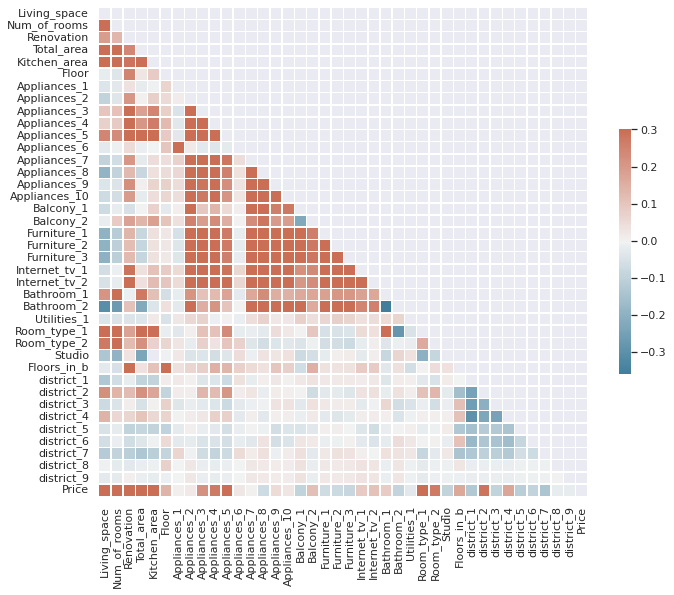

In [61]:

cols = df.columns.tolist()

cols = cols[:3] + cols[4:] + [cols[3]]

corr = df[cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 8.959999999999972, 'Price(thousands rubles)')

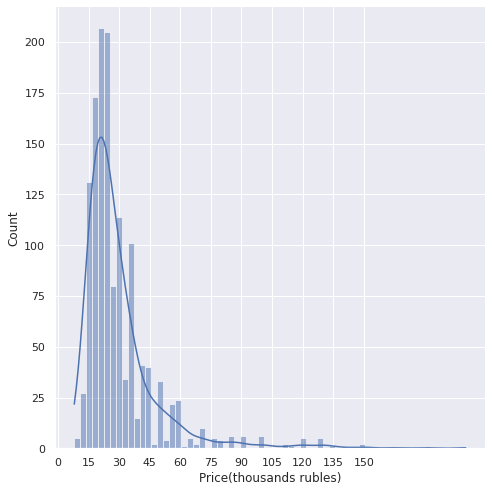

In [72]:
sns.displot(df['Price']/1000, kde=True, height=7)
plt.xticks(np.arange(11)*15)
plt.xlabel("Price(thousands rubles)")

0       27000
1       14000
2       40000
3       20000
4       22000
        ...  
1318    45000
1319    45000
1320    49999
1321    24000
1322    35000
Name: Price, Length: 1323, dtype: object